In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

from warnings import simplefilter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from os.path import exists
simplefilter('ignore')
SEED = 41
np.random.seed(SEED)
    
if not exists ('/kaggle/input/used-car-price-prediction-competition'):
    base_path = ('/kaggle/input/used-car-price-prediction-competition2')
else:
    base_path = ('/kaggle/input')
    
train = pd.read_csv(base_path + '/train.csv', index_col=0)
test = pd.read_csv(base_path + '/test.csv', index_col=0)
submission = pd.read_csv(base_path + '/Sample_Submition.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/used-car-price-prediction-competition2/Sample_Submition.csv
/kaggle/input/used-car-price-prediction-competition2/train.csv
/kaggle/input/used-car-price-prediction-competition2/test.csv


In [ ]:
train.head()

In [3]:
train.describe()

,id,year,odometer,lat,long,price
count,290129.00,290129.00,290129.00,285726.00,285726.00,290129.00
mean,7311503279.06,2011.36,97642.41,38.51,-94.62,51933.00
std,4378450.26,9.15,205897.00,5.83,18.32,9591680.31
min,7301583321.00,1900.00,0.00,-84.12,-159.83,0.00
25%,7308154295.00,2008.00,38000.00,34.60,-111.92,5991.00
50%,7312664164.00,2014.00,85615.00,39.17,-88.21,13990.00
75%,7315255273.00,2017.00,133436.00,42.41,-80.83,26500.00
max,7317101084.00,2022.00,10000000.00,82.25,173.89,3736928711.00


In [ ]:
train.info()

In [ ]:
train.duplicated().sum()

In [ ]:
train.drop(columns='id').duplicated().sum()  # There can be duplicated rows!!!

In [4]:
train.columns

Index(['id', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long', 'posting_date', 'price'],
      dtype='object')

In [8]:
train.drop(columns=["id", "state", "posting_date", "lat", "long"]).duplicated().sum()

0

In [5]:
col_check = ['year', 'manufacturer', 'model', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'size', 'type','price']

# Create a boolean mask for duplicated rows based on the specified columns
dupli_mask = train.duplicated(subset=col_check)

# Select the duplicated rows and display two instances of each
dupli_rows = train[dupli_mask]

dupli_rows

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
14689,7314527323,2017.00,infiniti,qx80 limited sport,good,8 cylinders,gas,60560.00,clean,automatic,4wd,NaN,other,white,az,32.21,-110.96,2021-04-29T14:11:18-0700,37590
335386,7311934099,2015.00,mercedes-benz,m-class,NaN,6 cylinders,gas,95900.00,clean,automatic,4wd,mid-size,SUV,white,sc,NaN,NaN,2021-04-24T13:09:04-0400,0
27860,7305693888,2016.00,NaN,Scion iM Hatchback 4D,good,NaN,gas,65203.00,clean,other,fwd,NaN,hatchback,red,ca,38.73,-120.80,2021-04-12T09:51:31-0700,14990
242351,7314976674,2020.00,mazda,mx-5 miata club,good,NaN,gas,2195.00,clean,other,rwd,NaN,other,NaN,nj,40.22,-74.76,2021-04-30T15:41:29-0400,31590
150576,7313362227,2019.00,ram,1500 classic regular cab,good,8 cylinders,gas,12302.00,clean,other,NaN,NaN,pickup,white,in,39.47,-87.38,2021-04-27T12:11:25-0400,25990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122579,7311922136,2010.00,chevrolet,corvette grand sport,good,8 cylinders,other,56302.00,clean,other,rwd,NaN,other,red,ga,32.08,-81.10,2021-04-24T12:51:04-0400,37990
304137,7308983201,2006.00,ram,3500 dually 5.9l 6-sp,NaN,6 cylinders,diesel,84891.00,clean,manual,4wd,NaN,truck,NaN,or,45.39,-122.61,2021-04-18T15:40:18-0700,0
358083,7316875320,2013.00,hyundai,santa fe sport awd,good,4 cylinders,gas,114000.00,clean,automatic,4wd,NaN,NaN,black,tx,32.82,-96.99,2021-05-04T14:06:55-0500,8900
152315,7313432323,2013.00,NaN,Scion xB,excellent,4 cylinders,gas,94000.00,clean,automatic,fwd,NaN,wagon,NaN,ia,42.48,-92.32,2021-04-27T13:00:51-0500,7300


In [ ]:
train[(train["manufacturer"]=="infiniti")&(train["price"]==37590)]

In [6]:
train.drop(dupli_rows.index, axis=0, inplace=True)

In [ ]:
round(train.isnull().sum() / train.shape[0] * 100, 2).sort_values()

In [ ]:
nulls = train[["id", "state", "posting_date", "odometer", "transmission", "model", 
       "year", "price", "fuel", "lat", "long", "title_status", "manufacturer", 
       "type", "paint_color", "drive", "condition", "cylinders", "size"]].isnull()

In [ ]:
sns.heatmap(nulls, yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation=45)
plt.show()

In [ ]:
test

In [ ]:
test.describe()

In [ ]:
test.duplicated().sum()

In [ ]:
test[['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'state', 'lat', 'long']].duplicated().sum()

In [7]:
test.drop(columns='id').duplicated().sum()  # There can be duplicated rows!!!

30

In [9]:
test.drop(columns=["id", "state", "posting_date", "lat", "long"]).duplicated().sum()

35051

In [ ]:
test.info()

In [ ]:
round(test.isnull().sum() / test.shape[0] * 100, 2).sort_values()

## Data Cleaning

In [10]:
df = train.copy()

In [ ]:
df.head(3)

In [ ]:
df.columns

In [12]:
df[['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 
    'transmission', 'drive', 'size', 'type','state', 'lat', 'long', 'price']].duplicated().sum()

3513

In [14]:
df[df[['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 
    'transmission', 'drive', 'size', 'type','state', 'lat', 'long', 'price']].duplicated(keep=False)]

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
60594,7316237972,2013.00,acura,mdx,NaN,6 cylinders,gas,72465.00,clean,automatic,4wd,NaN,SUV,NaN,ca,37.61,-122.06,2021-05-03T09:01:31-0700,225
42895,7312810410,2017.00,volkswagen,jetta,NaN,4 cylinders,gas,32823.00,clean,automatic,fwd,NaN,sedan,NaN,ca,33.76,-116.29,2021-04-26T08:19:08-0700,0
231439,7302158852,2007.00,ford,expedition el,NaN,NaN,gas,1.00,clean,automatic,NaN,NaN,NaN,NaN,nc,35.89,-80.10,2021-04-05T13:33:22-0400,7000
42711,7314097069,2013.00,nissan,altima,NaN,NaN,gas,130000.00,salvage,automatic,NaN,NaN,NaN,NaN,ca,34.00,-117.44,2021-04-28T16:04:11-0700,500
316256,7314629472,2017.00,ram,3500,NaN,6 cylinders,diesel,122867.00,clean,automatic,4wd,NaN,truck,NaN,or,44.95,-122.99,2021-04-29T18:04:38-0700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304805,7315811390,2019.00,ford,super duty f-250 srw,NaN,8 cylinders,diesel,35911.00,clean,automatic,4wd,NaN,NaN,NaN,or,44.57,-123.26,2021-05-02T10:12:30-0700,0
30441,7314951824,2018.00,ford,flex sel fwd,NaN,other,other,35150.00,NaN,automatic,fwd,NaN,NaN,NaN,ca,34.07,-117.46,2021-04-30T12:00:06-0700,0
26981,7309956748,1963.00,volkswagen,baja bug,NaN,NaN,gas,10000.00,clean,manual,NaN,NaN,NaN,NaN,ca,36.31,-119.31,2021-04-20T11:50:13-0700,6500
94275,7302030137,2008.00,toyota,camry,NaN,NaN,gas,152000.00,clean,automatic,NaN,NaN,NaN,NaN,fl,29.77,-82.28,2021-04-05T10:18:44-0400,700


In [19]:
df[(df["manufacturer"]=="toyota")&(df["model"]=="camry")&(df["price"]==700)]

,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
93873,7310266416,2011.00,toyota,camry,NaN,NaN,gas,136000.00,clean,automatic,NaN,NaN,NaN,NaN,fl,29.77,-82.28,2021-04-21T09:08:14-0400,700
98865,7314749926,2010.00,toyota,camry,NaN,NaN,gas,138000.00,clean,automatic,NaN,NaN,NaN,NaN,fl,29.77,-82.28,2021-04-30T09:09:53-0400,700
286815,7316273926,1998.00,toyota,camry,NaN,NaN,gas,108000.00,clean,automatic,NaN,NaN,NaN,NaN,oh,40.10,-82.93,2021-05-03T12:55:29-0400,700
100280,7302054574,2008.00,toyota,camry,NaN,NaN,gas,153000.00,clean,automatic,NaN,NaN,NaN,NaN,fl,29.77,-82.28,2021-04-05T10:59:32-0400,700
394002,7308529963,1990.00,toyota,camry,fair,4 cylinders,gas,282503.00,clean,manual,fwd,sub-compact,sedan,red,wa,46.98,-118.61,2021-04-17T16:08:52-0700,700
79949,7316637980,1993.00,toyota,camry,NaN,NaN,gas,250000.00,clean,automatic,NaN,NaN,NaN,NaN,ct,41.45,-71.87,2021-05-04T07:46:02-0400,700
94275,7302030137,2008.00,toyota,camry,NaN,NaN,gas,152000.00,clean,automatic,NaN,NaN,NaN,NaN,fl,29.77,-82.28,2021-04-05T10:18:44-0400,700


In [ ]:
# df[['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 
#     'transmission', 'drive', 'size', 'type','state', 'lat', 'long', 'price']].drop_duplicates(inplace=True)

#### State

In [ ]:
df[["state"]].sample(8)

In [ ]:
df["state"].value_counts(dropna=False)

#### Posting Date

In [ ]:
print(df["posting_date"].dtype)

In [20]:
# Convert the "posting_date" column to datetime with the corrected format (including time zone offset)
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
print(df["posting_date"].dtype)

# Set the time zone to the desired one, for example, 'America/New_York'
df['posting_date'] = df['posting_date'].dt.tz_convert('America/New_York')  # UTC -04:00

# Create separate columns for date, year, month, day, and time
df['date'] = df['posting_date'].dt.date
df['posting_year'] = df['posting_date'].dt.year
df['month'] = df['posting_date'].dt.month
df['day'] = df['posting_date'].dt.day
df['time'] = df['posting_date'].dt.time
df["age"] = df["posting_year"] - df["year"]

datetime64[ns, UTC]


In [ ]:
df["posting_date"].info()

In [ ]:
df["posting_date"].min(), df["posting_date"].max(), df["posting_date"].max() - df["posting_date"].min()

In [ ]:
df[["posting_date"]].sample(8)

In [ ]:
df.sample(5)

#### Odometer

In [ ]:
df[["odometer"]].sample(8)

In [ ]:
df["odometer"].describe()

#### Transmission

In [ ]:
df[["transmission"]].sample(8)

In [ ]:
df["transmission"].value_counts(dropna=False)

In [21]:
df['transmission'] = df['transmission'].replace('other', np.NaN)

#### Model

In [ ]:
df[["model"]].sample(8)

In [36]:
df["model"].value_counts(dropna=False)

f-150                       3447
silverado 1500              2123
1500                        1820
camry                       1646
accord                      1606
                            ... 
f150 xlt sport 4x4             1
yukon slt sport                1
titan sl 4x4 1/2 ton gas       1
Freightliner FL50              1
vibe base fwd 4dr wagon        1
Name: model, Length: 24300, dtype: int64

In [37]:
df["model"].value_counts(dropna=False).tail(24300-8782)

ecoline van e350               1
forte lx auto                  1
amc javelin                    1
Olds Intrigue                  1
a6 quattro premium plus awd    1
                              ..
f150 xlt sport 4x4             1
yukon slt sport                1
titan sl 4x4 1/2 ton gas       1
Freightliner FL50              1
vibe base fwd 4dr wagon        1
Name: model, Length: 15518, dtype: int64

In [ ]:
df.shape

#### Price

In [ ]:
df[["price"]].sample(8)

In [ ]:
df["price"].describe()

#### Fuel

In [ ]:
df[["fuel"]].sample(8)

In [ ]:
df["fuel"].value_counts(dropna=False)

In [40]:
df['fuel'] = df['fuel'].replace('other', np.NaN)

#### Title Status

In [ ]:
df[["title_status"]].sample(8)

In [ ]:
df["title_status"].value_counts(dropna=False)

#### Manufacturer

In [ ]:
df[["manufacturer"]].sample(8)

In [ ]:
df["manufacturer"].value_counts(dropna=False)

#### Type

In [ ]:
df[["type"]].sample(8)

In [ ]:
df["type"].value_counts(dropna=False)

In [41]:
df['type'] = df['type'].replace('other', np.NaN)

#### Paint Color

In [ ]:
df[["paint_color"]].sample(8)

In [ ]:
df["paint_color"].value_counts(dropna=False)

#### Drive

In [ ]:
df[["drive"]].sample(8)

In [ ]:
df["drive"].value_counts(dropna=False)

#### Condition

In [ ]:
df[["condition"]].sample(8)

In [ ]:
df["condition"].value_counts(dropna=False)

#### Cylinders

In [ ]:
df[["cylinders"]].sample(8)

In [42]:
# Use a regular expression to extract the numeric part from the "cylinders" column
df['cylinders'] = df['cylinders'].str.replace(r'(\d+)\s*cylinders', r'\1', regex=True)

# Replace "other" with 1
df['cylinders'] = df['cylinders'].replace('other', np.nan)

# Convert the "cylinders" column to numeric type
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

# The "cylinders" column now contains the desired numeric values and NaN for missing values

In [ ]:
df["cylinders"].value_counts(dropna=False)

#### Size

In [ ]:
df[["size"]].sample(8)

In [ ]:
df["size"].value_counts(dropna=False)

In [ ]:
df.columns

In [43]:
df = df[['manufacturer', 'model', 'title_status', 'transmission', 'fuel', 'odometer', 'state', 'lat', 'long', 
         'year', "age", "posting_year", 'month', 'day', 'time', 'posting_date', 'date', 'price', 
         'cylinders','drive', 'size', 'type', 'condition', 'paint_color']]

In [ ]:
df

## Missing Value Handling

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.dropna().sample(5)

In [ ]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)

# df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)


# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df =  imputer.fit_transform(df[["lat", "long"]])

In [44]:
def fill_missing(df, fill_col, use_col):
    """
    Parameters
    -------------------
    df : Dataset.
        Dataset name which has null value.
    
    fill_col : Text.
        The column name whose missing values will be filling.
    
    use_col : Text or List of Text.
        The referenced column name(s) to fill missing values.
    """
    if isinstance(use_col, str):
        # When 'use_col' is a single column
        df[fill_col] = df.groupby(use_col)[fill_col].ffill().bfill()
    elif isinstance(use_col, list):
        # When 'use_col' is a list of multiple columns
        df[fill_col] = df.groupby(use_col)[fill_col].ffill().bfill()
    else:
        raise ValueError("The 'use_col' parameter must be a single column name or a list of column names.")

#### Fuel Column

In [45]:
fill_missing(df, "fuel", "model")

In [ ]:
df["fuel"].isnull().sum()

#### Lat - Long Columns

In [ ]:
df[["lat", "long"]].isnull().sum()

In [46]:
# Group by the "state" column and calculate the mode of "lat" and "long" for each state group
state_mode_lat = df.groupby('state')['lat'].transform(lambda x: x.mode().iloc[0])
state_mode_long = df.groupby('state')['long'].transform(lambda x: x.mode().iloc[0])

# Fill missing values in "lat" and "long" columns with the mode of each state group
df['lat'] = df['lat'].fillna(state_mode_lat)
df['long'] = df['long'].fillna(state_mode_long)

In [ ]:
df[["lat", "long"]].isnull().sum()

#### Manufacturer

In [47]:
fill_missing(df, "manufacturer", "model")

In [ ]:
df["manufacturer"].isnull().sum()

#### Type

In [ ]:
pd.DataFrame(df.groupby(["manufacturer", "model", "fuel", "cylinders"]).type.value_counts(dropna=False).sample(30))

In [48]:
fill_missing(df, "type", ["manufacturer", "model", "fuel", "cylinders"])

In [ ]:
df["type"].isnull().sum()

#### Paint Color

In [ ]:
# we cannot fill it

#### Drive

In [ ]:
pd.DataFrame(df.groupby(["manufacturer", "model", "fuel", "cylinders"]).drive.value_counts(dropna=False).sample(30))

In [49]:
fill_missing(df, "drive", ["manufacturer", "model", "cylinders"])

In [50]:
df["drive"].isnull().sum()

0

#### Condition

In [ ]:
pd.DataFrame(df.groupby(["title_status"]).condition.value_counts(dropna=False).sample(30))

In [ ]:
df["condition"].isnull().sum()

In [ ]:
# we cannot fill it

#### Cylinders

In [ ]:
pd.DataFrame(df.groupby(["manufacturer", "model", "fuel", "drive"]).cylinders.value_counts(dropna=False).sample(30))

In [51]:
df.loc[df['fuel'] == 'electric', 'cylinders'] = 0

In [52]:
fill_missing(df, "cylinders", ["manufacturer", "model", "fuel", "drive"])

In [ ]:
df["cylinders"].isnull().sum()

#### Size

In [ ]:
pd.DataFrame(df.groupby(["manufacturer", "model", "type"])["size"].value_counts(dropna=False).sample(30))

In [53]:
fill_missing(df, "size", ["manufacturer", "model", "type"])

In [ ]:
df["size"].isnull().sum()

#### Tramsmission

In [ ]:
pd.DataFrame(df.groupby(["manufacturer", "model", "drive", "type"]).transmission.value_counts(dropna=False).sample(30))

In [54]:
fill_missing(df, "transmission", ["manufacturer", "model", "drive", "type"])

In [ ]:
df["transmission"].isnull().sum()

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation=45)
plt.show()

## Outlier Detection

In [55]:
df_num = df.select_dtypes(include=['int', "float"])
df_num.columns

Index(['odometer', 'lat', 'long', 'year', 'age', 'posting_year', 'month',
       'day', 'price', 'cylinders'],
      dtype='object')

In [56]:
df_obj = df.select_dtypes(include='object')
df_obj.columns

Index(['manufacturer', 'model', 'title_status', 'transmission', 'fuel',
       'state', 'time', 'date', 'drive', 'size', 'type', 'condition',
       'paint_color'],
      dtype='object')

### Numeric Columns

#### Odometer

In [ ]:
df["odometer"].describe()

In [ ]:
df["odometer"].sort_values().tail(30)

In [ ]:
df[df["odometer"] >= 2000000].sort_values(by="odometer").head(30)

In [ ]:
df[df["odometer"] >= 3000000].sort_values(by="odometer").head(15)

In [ ]:
df[df["odometer"] >= 5000000].sort_values(by="odometer")

In [ ]:
plot_odo = df[df['odometer'] < 250000]["odometer"]

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_odo, bins=50)

plt.subplot(122)
plt.boxplot(plot_odo,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [ ]:
plot_odoX = df[df['odometer'] > 250000]["odometer"]

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_odoX, bins=30)

plt.subplot(122)
plt.boxplot(plot_odoX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [ ]:
plot_odoX2 = df[df['odometer'] > 1000000]["odometer"]

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_odoX2, bins=30)

plt.subplot(122)
plt.boxplot(plot_odoX2,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [57]:
df.drop(df[df['odometer'] > 1000000].index, axis=0, inplace=True)

#### Year

In [ ]:
df["year"].describe()

In [ ]:
df["year"].value_counts(dropna=False)

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["year"], bins=50)

plt.subplot(122)
plt.boxplot(df["year"],
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [ ]:
plot_year = df[df['year'] > 1980]["year"]

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_year, bins=50)

plt.subplot(122)
plt.boxplot(plot_year,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [59]:
plot_yearX = df[df['year'] < 1965]["year"]

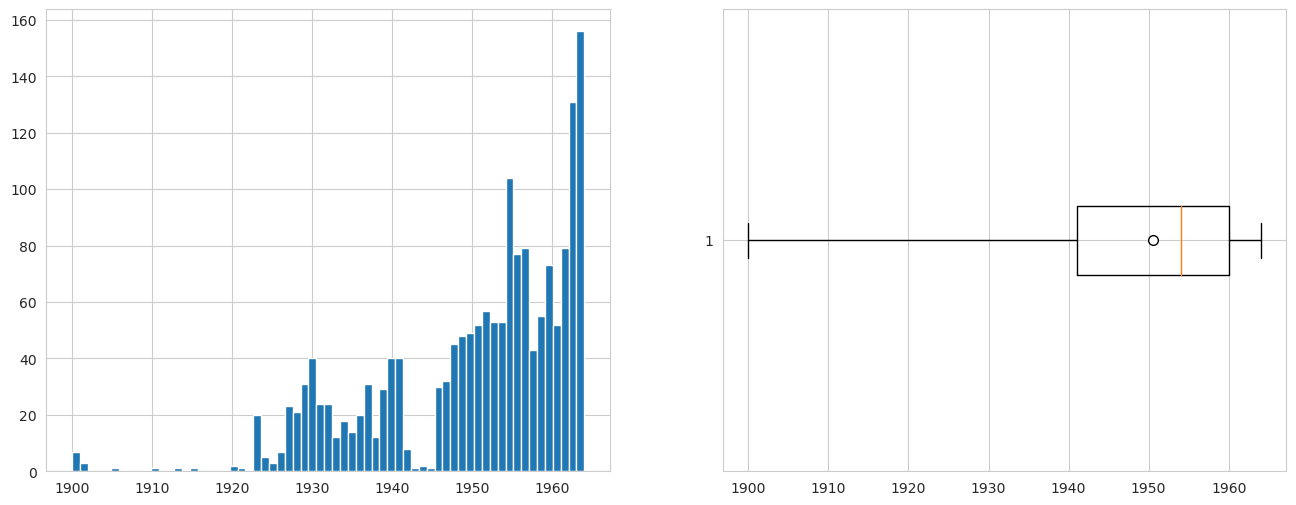

In [61]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_yearX, bins=65)  #, bins=50

plt.subplot(122)
plt.boxplot(plot_yearX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [62]:
df[df['year'] < 1948]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
384519,chevrolet,business coupe,clean,automatic,gas,500.00,va,37.51,-77.56,1939.00,82.00,2021,5,1,06:18:03,2021-05-01 06:18:03-04:00,2021-05-01,29995,8.00,rwd,mid-size,coupe,good,blue
311213,chevrolet,HUDSON Convertible,clean,manual,gas,90000.00,or,42.57,-123.52,1946.00,75.00,2021,4,10,22:11:10,2021-04-10 22:11:10-04:00,2021-04-10,1,6.00,rwd,full-size,convertible,good,red
412159,dodge,brothers touring sedan,clean,manual,gas,59000.00,wi,43.12,-88.34,1936.00,85.00,2021,4,19,09:06:47,2021-04-19 09:06:47-04:00,2021-04-19,3500,6.00,4wd,full-size,truck,NaN,NaN
327596,pontiac,sedan,clean,manual,gas,50000.00,pa,41.31,-79.05,1936.00,85.00,2021,4,18,09:10:26,2021-04-18 09:10:26-04:00,2021-04-18,11000,6.00,rwd,full-size,sedan,good,custom
130326,chevrolet,pickup,clean,manual,gas,0.00,id,46.52,-116.39,1941.00,80.00,2021,4,23,21:10:50,2021-04-23 21:10:50-04:00,2021-04-23,14000,4.00,fwd,compact,convertible,excellent,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398221,chrysler,model 70,clean,manual,gas,5557.00,wa,48.02,-122.54,1927.00,94.00,2021,4,27,17:53:30,2021-04-27 17:53:30-04:00,2021-04-27,15900,4.00,fwd,full-size,coupe,excellent,yellow
337519,jeep,m.b. model willis,clean,manual,gas,999999.00,sc,34.17,-82.03,1945.00,76.00,2021,4,22,12:54:18,2021-04-22 12:54:18-04:00,2021-04-22,22000,4.00,4wd,compact,sedan,good,green
90791,ford,coupe,clean,automatic,gas,17000.00,fl,26.95,-82.00,1930.00,91.00,2021,5,3,14:33:24,2021-05-03 14:33:24-04:00,2021-05-03,39500,8.00,rwd,full-size,coupe,excellent,red
151396,ford,1925 Model TT Dump Truck,clean,manual,gas,1.00,ia,41.98,-91.71,1925.00,96.00,2021,4,13,18:25:58,2021-04-13 18:25:58-04:00,2021-04-13,12000,4.00,rwd,compact,truck,excellent,black


In [63]:
df.drop(df[df['year'] < 1948].index, axis=0, inplace=True)

#### Age

In [ ]:
df["age"].describe()

In [ ]:
df["age"].value_counts(dropna=False)

In [ ]:
df[df["age"] < 0]

In [64]:
df.drop(df[df["age"] < 0].index, axis=0, inplace=True)

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['age'], bins=50)

plt.subplot(122)
plt.boxplot(df['age'],
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [ ]:
plot_ageX = df[df['age'] > 35]["age"]

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_ageX, bins=40)

plt.subplot(122)
plt.boxplot(plot_ageX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [65]:
df[df['age'] > 68]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
89831,gmc,truck,clean,automatic,gas,150.00,fl,28.97,-81.03,1949.00,72.00,2021,4,16,15:48:16,2021-04-16 15:48:16-04:00,2021-04-16,18000,8.00,rwd,full-size,truck,good,black
287241,ford,deluxe,clean,automatic,gas,99999.00,oh,38.39,-78.99,1951.00,70.00,2021,4,30,04:38:26,2021-04-30 04:38:26-04:00,2021-04-30,5950,6.00,fwd,full-size,wagon,good,grey
328120,ford,f1,clean,manual,gas,800.00,pa,40.43,-79.87,1948.00,73.00,2021,4,13,14:04:37,2021-04-13 14:04:37-04:00,2021-04-13,8500,4.00,4wd,mid-size,SUV,NaN,NaN
105671,chevrolet,belair,clean,automatic,gas,2940.00,fl,27.30,-82.51,1952.00,69.00,2021,4,23,13:15:27,2021-04-23 13:15:27-04:00,2021-04-23,51800,8.00,4wd,full-size,pickup,excellent,NaN
413922,ram,49 Willys,clean,manual,gas,49000.00,wy,41.22,-104.66,1949.00,72.00,2021,5,2,15:16:22,2021-05-02 15:16:22-04:00,2021-05-02,8500,4.00,4wd,compact,SUV,excellent,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240714,toyota,1949 Diamond T,clean,manual,gas,999999.00,nv,39.20,-119.75,1949.00,72.00,2021,4,28,19:53:52,2021-04-28 19:53:52-04:00,2021-04-28,14500,6.00,4wd,mid-size,SUV,NaN,NaN
292424,ford,f100,clean,automatic,gas,12345.00,oh,39.29,-81.70,1948.00,73.00,2021,4,26,22:03:48,2021-04-26 22:03:48-04:00,2021-04-26,5500,8.00,fwd,mid-size,sedan,NaN,NaN
383650,nissan,1952 Bentley Mark VI,clean,automatic,gas,48700.00,va,39.11,-77.25,1952.00,69.00,2021,4,11,16:48:54,2021-04-11 16:48:54-04:00,2021-04-11,39788,6.00,rwd,mid-size,sedan,good,black
239209,chevrolet,coupe,clean,automatic,gas,12345.00,nv,38.89,-104.74,1950.00,71.00,2021,5,3,19:19:51,2021-05-03 19:19:51-04:00,2021-05-03,22000,8.00,rwd,mid-size,sedan,like new,yellow


In [ ]:
# df.drop(df[df['age'] > 67].index, axis=0, inplace=True)

#### Posting Year, Month, Day

In [ ]:
df["posting_year"].describe()

In [ ]:
df["month"].describe()

In [ ]:
df["day"].describe()

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df["day"], bins=30)

plt.subplot(122)
plt.boxplot(df["day"],
            vert=False,
            whis=1.5)

plt.show()

#### Price

In [ ]:
df["price"].describe()

In [ ]:
df["price"].sort_values().tail(30)

In [ ]:
plot_price = df[df['price'] < 50000]["price"]

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_price, bins=50)

plt.subplot(122)
plt.boxplot(plot_price,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [66]:
df[df['price'] > 90000]

,manufacturer,model,title_status,transmission,fuel,odometer,state,lat,long,year,age,posting_year,month,day,time,posting_date,date,price,cylinders,drive,size,type,condition,paint_color
390044,ferrari,360 modena spyder,clean,automatic,gas,34123.00,wa,48.75,-122.47,2004.00,17.00,2021,4,13,12:06:31,2021-04-13 12:06:31-04:00,2021-04-13,116899,8.00,rwd,mid-size,convertible,good,red
241273,nissan,plymouth barracuda,clean,manual,gas,77000.00,nv,33.68,-117.91,1970.00,51.00,2021,4,26,17:00:20,2021-04-26 17:00:20-04:00,2021-04-26,179888,8.00,rwd,full-size,sedan,excellent,green
353914,chrysler,Mclaren 570GT W/ Upgrades,clean,automatic,gas,13000.00,tx,32.79,-96.80,2017.00,4.00,2021,4,30,10:22:23,2021-04-30 10:22:23-04:00,2021-04-30,139950,8.00,rwd,mid-size,coupe,NaN,NaN
194442,tesla,model s,clean,automatic,electric,18835.00,mi,42.45,-85.67,2018.00,3.00,2021,5,1,10:42:04,2021-05-01 10:42:04-04:00,2021-05-01,104990,0.00,fwd,full-size,sedan,NaN,red
17170,volkswagen,23-window samba deluxe,clean,manual,gas,76859.00,ar,36.04,-94.25,1974.00,47.00,2021,4,23,11:44:44,2021-04-23 11:44:44-04:00,2021-04-23,149000,4.00,rwd,full-size,pickup,new,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131402,audi,s8 4.0t twin turbo v8 quattro awd like new,clean,automatic,gas,174.00,id,45.52,-122.43,2020.00,1.00,2021,5,4,17:17:57,2021-05-04 17:17:57-04:00,2021-05-04,129900,8.00,4wd,mid-size,sedan,NaN,white
40025,jaguar,xk 150,clean,manual,gas,64765.00,ca,33.79,-117.79,1959.00,62.00,2021,5,3,00:28:03,2021-05-03 00:28:03-04:00,2021-05-03,150000,6.00,rwd,compact,convertible,excellent,white
301369,porsche,taycan,clean,automatic,electric,1000.00,ok,36.00,-95.89,2020.00,1.00,2021,4,10,19:22:16,2021-04-10 19:22:16-04:00,2021-04-10,130000,0.00,4wd,full-size,sedan,new,black
40102,mercedes-benz,sprinter,clean,automatic,diesel,64000.00,ca,33.70,-117.76,2018.00,3.00,2021,5,2,19:55:02,2021-05-02 19:55:02-04:00,2021-05-02,120000,6.00,4wd,mid-size,van,good,white


In [67]:
plot_priceX = df[(df['price'] > 90000) & (df['price'] < 350000)]["price"]

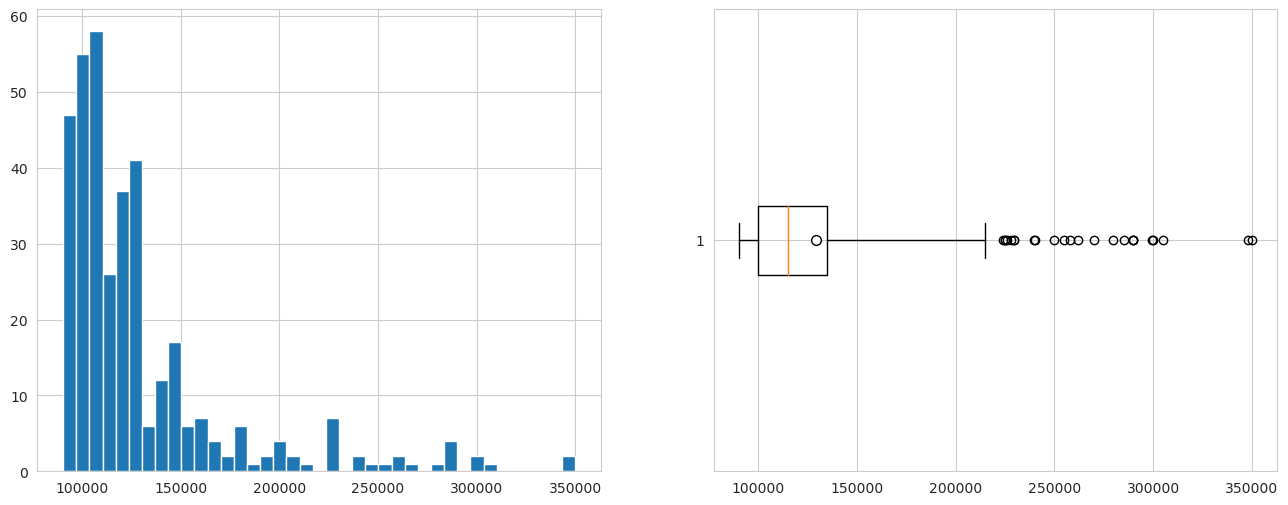

In [68]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(plot_priceX, bins=39)  #, bins=50

plt.subplot(122)
plt.boxplot(plot_priceX,
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

In [69]:
df.drop(df[df['price'] > 150000].index, axis=0, inplace=True)

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.hist(df['price'], bins=50)

plt.subplot(122)
plt.boxplot(df['price'],
            vert=False,
            whis=2.5,
            showmeans=True,
#             showfliers=False,
            meanprops={
                "marker": "o",
                "markerfacecolor": "white",
                "markeredgecolor": "black",
                "markersize": "7"
            })

plt.show()

#### Cylinders

In [ ]:
df["cylinders"].describe()

In [ ]:
df["cylinders"].value_counts(dropna=False)

In [ ]:
corr = df[['odometer', 'year', 'age', 'month', 'day', 'price', 'cylinders']].corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', ax=None, linewidths=1.5, center=0, annot=True,
            fmt='.2f', square=True, xticklabels=(corr.index), yticklabels=(corr.columns))

plt.xticks(rotation=60)
plt.yticks(rotation=30)
plt.grid('off')
plt.show()

In [70]:
df.drop(["posting_year", "month", "day", "date"], axis=1, inplace=True)

In [71]:
df.sort_values(by="posting_date", inplace=True)

In [72]:
df.reset_index(inplace=True)

In [ ]:
df

#### Latitude and Longitude

In [ ]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='long', y='lat', data=df, hue="state", legend=False);
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.show()

In [ ]:
import folium
import branca.colormap as cm

In [ ]:
data = pd.DataFrame(df.groupby(["state", "lat", "long"])["index"].count())
data = data.reset_index()
data.columns = ["state", "lat", "long", "cnt"]

In [ ]:
data = data.sort_values(by="cnt", ascending=False)

In [ ]:
data

In [ ]:
# loc = [df["lat"].mean(), df["long"].mean()]
# m = folium.Map(location=loc, zoom_start=4)

# colormap = cm.StepColormap(colors=["purple", "orange"])

# for loc, p in zip(zip(data['lat'], data['long']), data["cnt"]):
#     folium.Circle(location=loc, radius=1.5, fill=True,
#                   color=colormap(p)).add_to(m)
    
# # Top 100 location in the DataFrame is added as a marker to the map
# for i in range(0, len(data) // 465):
#     folium.Marker([data['lat'].iloc[i], data['long'].iloc[i]], 
#                   tooltip=folium.Tooltip(f"{data.state.iloc[i]} - Total Post: {data.cnt.iloc[i]}")).add_to(m)

# m

### Object Columns

#### Manufacturer

In [ ]:
df["manufacturer"].describe()

In [ ]:
df["manufacturer"].value_counts(dropna=False)

In [ ]:
# we can drop harley-davidson, datsun, ferrari, aston-martin, land rover

#### Model

In [ ]:
df.isnull().any()

In [ ]:
df["model"].describe()

In [ ]:
df["model"].sample(20)

In [ ]:
df["manufacturer"].value_counts().sort_index()

In [ ]:
df_model = df.groupby(["manufacturer", "model"])[["index"]].count()
df_model

In [99]:
df["model"].value_counts(dropna=False)

f-150                      3439
silverado 1500             2123
1500                       1819
camry                      1645
accord                     1603
                           ... 
2500 hd z71 4x4               1
navigator ultimate 4x4        1
IHC 4700                      1
f150 super crew 5.0 4x4       1
f250 superduty 4wd xl         1
Name: model, Length: 23995, dtype: int64

In [98]:
df["model"].value_counts(dropna=False).head(8708).values  #11567

array([3439, 2123, 1819, ...,    2,    2,    1])

In [102]:
# Get the not desired values from the tail of the value counts in the "model" column
drop_model = df["model"].value_counts(dropna=False).tail(15287).index

# Create a boolean mask to filter rows with not desired values in the 'model' column
mask_drop_model = df['model'].isin(drop_model)

# Drop rows where 'model' column has not desired values
df = df[~mask_drop_model]
df.shape

(164793, 21)

#### Title Status

In [ ]:
df["title_status"].describe()

In [ ]:
df["title_status"].value_counts(dropna=False)

In [ ]:
# we can drop title_status because we cannot fill NaN values

#### Transmission

In [ ]:
df["transmission"].describe()

In [ ]:
df["transmission"].value_counts(dropna=False)

#### Fuel

In [ ]:
df["fuel"].describe()

In [ ]:
df["fuel"].value_counts(dropna=False)

#### State

In [ ]:
df["state"].describe()

In [ ]:
df["state"].value_counts(dropna=False)

#### Drive

In [ ]:
df["drive"].describe()

In [ ]:
df["drive"].value_counts(dropna=False)

#### Size

In [ ]:
df["size"].describe()

In [ ]:
df["size"].value_counts(dropna=False)

#### Type

In [ ]:
df["type"].describe()

In [ ]:
df["type"].value_counts(dropna=False)

#### Condition

In [ ]:
df["condition"].describe()

In [ ]:
df["condition"].value_counts(dropna=False)

In [ ]:
# we cannot fill NaN values, so we can drop condition

#### Paint Color

In [ ]:
df["paint_color"].describe()

In [ ]:
df["paint_color"].value_counts(dropna=False)

In [ ]:
# we cannot fill NaN values, so we can drop paint_color

In [103]:
df.drop(["title_status", "condition", "paint_color"], axis=1, inplace=True)

In [104]:
df.reset_index(drop=True, inplace=True)

In [105]:
df_num = df.select_dtypes(include=['int', "float"])
df_num.columns

Index(['index', 'odometer', 'lat', 'long', 'year', 'age', 'price',
       'cylinders'],
      dtype='object')

In [106]:
df_obj = df.select_dtypes(include='object')
df_obj.columns

Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'time',
       'drive', 'size', 'type'],
      dtype='object')

In [ ]:
df

In [107]:
df.isnull().sum().sort_values(ascending=False)

index           0
manufacturer    0
size            0
drive           0
cylinders       0
price           0
posting_date    0
time            0
age             0
year            0
long            0
lat             0
state           0
odometer        0
fuel            0
transmission    0
model           0
type            0
dtype: int64

In [ ]:
# df.to_pickle('data_prepared.pkl')

## Modeling

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate

In [109]:
df.describe()

,index,odometer,lat,long,year,age,price,cylinders
count,164793.00,164793.00,164793.00,164793.00,164793.00,164793.00,164793.00,164793.00
mean,205235.07,104087.63,38.47,-95.32,2010.34,10.66,14487.26,5.76
std,120107.29,71011.51,5.91,18.60,8.82,8.82,13777.07,1.65
min,4.00,0.00,-81.84,-159.83,1948.00,0.00,0.00,0.00
25%,101097.00,52272.00,34.71,-112.36,2007.00,5.00,4995.00,4.00
50%,204462.00,99426.00,39.26,-89.79,2012.00,9.00,10438.00,6.00
75%,309982.00,144281.00,42.38,-81.05,2016.00,14.00,19995.00,8.00
max,414469.00,1000000.00,82.25,173.89,2021.00,73.00,150000.00,12.00


In [ ]:
df.info()

In [ ]:
for col in df_obj:
    print(f"{col:<20}:", df[col].nunique())

In [110]:
df_num.corr()[(df_num.corr()>= 0.9) & (df_num.corr() < 1)].any().any()

False

In [111]:
df_num.corr()[(df_num.corr()<= -0.9) & (df_num.corr() > -1)].any().any()

True

In [112]:
df_num.corr()

,index,odometer,lat,long,year,age,price,cylinders
index,1.00,0.01,0.21,0.27,0.01,-0.01,-0.00,0.01
odometer,0.01,1.00,0.01,0.08,-0.33,0.33,-0.37,0.10
lat,0.21,0.01,1.00,-0.09,-0.01,0.01,0.01,-0.00
long,0.27,0.08,-0.09,1.00,-0.04,0.04,-0.11,0.00
year,0.01,-0.33,-0.01,-0.04,1.00,-1.00,0.29,-0.18
age,-0.01,0.33,0.01,0.04,-1.00,1.00,-0.29,0.18
price,-0.00,-0.37,0.01,-0.11,0.29,-0.29,1.00,0.19
cylinders,0.01,0.10,-0.00,0.00,-0.18,0.18,0.19,1.00


In [ ]:
df.sample(3)

### XGB Regressor Model

#### Train Test Split

In [113]:
X = df.drop(["index", "year", "time", "posting_date", "price"], axis=1)
y = df.price

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (123594, 13)
Train target shape   :  (123594,)
Test features shape  :  (41199, 13)
Test target shape    :  (41199,)


In [116]:
cat = X.select_dtypes("object").columns
cat

Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object')

In [117]:
import xgboost as xgb

xgb.__version__

'1.7.6'

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [119]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [120]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [121]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(random_state=42, objective="reg:squarederror", tree_method='gpu_hist'))]

m_pipe = Pipeline(steps=operations)

m_pipe.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              c...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [122]:
m_xgb = XGBRegressor(random_state=42, objective="reg:squarederror", tree_method='gpu_hist')
m_xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))  # X_train, y_train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# from xgboost import plot_importance

# plot_importance(m_xgb);

In [123]:
train_val(m_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.71,0.64
mae,4494.16,4880.61
mse,54436446.90,67355035.40
rmse,7378.11,8207.01


In [ ]:
# pred_xgb = m_pipe.predict(X_test)
# # pred_xgb

#### Cross Validation for XGB

In [124]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans),
              ("m_XGB",
               XGBRegressor(random_state=42, objective="reg:squarederror", tree_method='gpu_hist'))]

m_cv = Pipeline(steps=operations)

scores = cross_validate(m_cv,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10)

pd.DataFrame(scores)#.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.75,0.08,0.64,-4985.64,-68433459.39,-8272.45
1,0.73,0.08,0.61,-4977.88,-75110782.40,-8666.65
2,0.72,0.08,0.60,-5018.65,-74276080.71,-8618.36
3,0.83,0.08,0.63,-5012.45,-70076409.20,-8371.17
4,0.72,0.08,0.61,-5018.54,-76540313.03,-8748.73
5,0.73,0.08,0.63,-4886.91,-70949376.55,-8423.15
6,0.72,0.08,0.64,-4865.88,-68197162.19,-8258.16
7,0.73,0.08,0.62,-4985.68,-71053958.46,-8429.35
8,0.73,0.08,0.62,-4970.72,-71395678.33,-8449.60
9,0.72,0.08,0.65,-4868.90,-66401343.22,-8148.70


#### k-fold Cross Validation

In [126]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

In [127]:
# cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [131]:
# scores = cross_val_score(m_pipe, X_train, y, cv=cv, verbose=2, n_jobs=-1, scoring='r2', error_score="raise")

#### Grid Search for XGB

In [132]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# from tqdm import tqdm

In [146]:
param_grid = {
    "XGB_model__colsample_bytree": [0.8],
    "XGB_model__learning_rate": [0.05, 0.08],
    "XGB_model__max_depth": [9],
    "XGB_model__n_estimators": [1750, 2200],
    "XGB_model__subsample": [1]
}

In [ ]:
# {'XGB_model__colsample_bytree': 1,
#  'XGB_model__learning_rate': 0.1,
#  'XGB_model__max_depth': 5,
#  'XGB_model__n_estimators': 600,
#  'XGB_model__subsample': 0.8}

# ---

# {'XGB_model__colsample_bytree': 1,
#  'XGB_model__learning_rate': 0.3,
#  'XGB_model__max_depth': 6,
#  'XGB_model__n_estimators': 700,
#  'XGB_model__subsample': 0.8}

# ---

# {'XGB_model__colsample_bytree': 0.8,
#  'XGB_model__learning_rate': 0.05,
#  'XGB_model__max_depth': 9,
#  'XGB_model__n_estimators': 2000,
#  'XGB_model__subsample': 1}

In [147]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(random_state=101, objective="reg:squarederror", tree_method='gpu_hist'))]

m_pipe = Pipeline(steps=operations)

m_grid = GridSearchCV(estimator=m_pipe,
                          param_grid=param_grid,
                          scoring="r2",  #'neg_root_mean_squared_error', 
                          cv=5,
                          return_train_score=True,
                          n_jobs=-1, 
                          verbose=2,
                          error_score='raise')

In [135]:
!pip install numpy==1.22.4 --ignore-installed

import numpy as np
np.__version__

# /opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy
# (detected version 1.23.5 warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 54.4 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
cudf 23.6.1 requires protobuf<4.22,>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
cuml 23.6.0 requires dask==2023.3.2, but you have dask 2023.7.0 which is incompatible.
dask-cuda 23.6.0 requires dask==2023.3.2, but you have dask

'1.23.5'

In [148]:
m_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['manufacturer', 'model', 'transmission', 'fuel', 'state', 'drive',
       'size', 'type'],
      dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegress...
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8],
                         'XGB_model__learning_rate': [0.05, 0.1],
                         'XGB_model__max_depth': [9],
                         'XGB_model__n_estimators': [1500, 2000],
                         'XGB_model__subsample': [1]},
             return_train_score=True, scoring='r2', verbose=2)

In [149]:
m_grid.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 9,
 'XGB_model__n_estimators': 2000,
 'XGB_model__subsample': 1}

In [150]:
m_grid.best_score_

0.6811850593927337

In [151]:
train_val(m_grid, X_train, y_train, X_test, y_test)

,train,test
R2,0.96,0.71
mae,1693.21,4180.77
mse,7162548.96,54730580.28
rmse,2676.29,7398.01


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.05, XGB_model__max_depth=9, XGB_model__n_estimators=1500, XGB_model__subsample=1; total time=  29.6s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.05, XGB_model__max_depth=9, XGB_model__n_estimators=1500, XGB_model__subsample=1; total time=  28.5s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.05, XGB_model__max_depth=9, XGB_model__n_estimators=1500, XGB_model__subsample=1; total time=  27.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.05, XGB_model__max_depth=9, XGB_model__n_estimators=2000, XGB_model__subsample=1; total time=  23.7s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.05, XGB_model__max_depth=9, XGB_model__n_estimators=2000, XGB_model__subsample=1; total time=  22.6s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=9, XGB_model__n_estimators=1500, XGB_model__subsample=1; 

In [ ]:
# 	train	test
# R2	0.79	0.76
# mae	4188.90	4393.18
# mse	44173275.94	50179202.23
# rmse	6646.30	7083.73


# 	train	test
# R2	0.89	0.80
# mae	3057.98	3895.89
# mse	22265818.25	41397827.91
# rmse	4718.67	6434.11


# train	test
# R2	0.96	0.71
# mae	1693.21	4180.77
# mse	7162548.96	54730580.28
# rmse	2676.29	7398.01

#### XGB Model Feature Importance and Selection

In [161]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(colsample_bytree=0.8,
                            learning_rate=0.08,
                            max_depth=6,
                            n_estimators=1000,
                            subsample=1,
                            objective='reg:squarederror',
                            random_state=42,
                            tree_method='gpu_hist'))]

m_pipe = Pipeline(steps=operations)

m_pipe.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
# {'XGB_model__colsample_bytree': 1,
#  'XGB_model__learning_rate': 0.3,
#  'XGB_model__max_depth': 8,
#  'XGB_model__n_estimators': 1000,
#  'XGB_model__subsample': 0.8}

# ---

# lr 0.2
# train	test
# R2	0.96	0.84
# mae	1739.95	3214.17
# mse	7894322.89	33681110.56
# rmse	2809.68	5803.54

# n est 1000 -> 700
# R2	0.95	0.84
# mae	2084.95	3334.80
# mse	11014755.27	34508897.79
# rmse	3318.85	5874.43

# m dep 8 -> 6
# train	test
# R2	0.87	0.81
# mae	3304.92	3878.25
# mse	27375512.86	40939509.05
# rmse	5232.16	6398.40

In [160]:
m_pipe["XGB_model"].feature_importances_

NotFittedError: need to call fit or load_model beforehand

In [154]:
fea = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns) 
# fea

In [155]:
imp_fea = pd.DataFrame(data=m_pipe["XGB_model"].feature_importances_,
                         columns=['xgb_Importance'],
                         index=fea)
xgb_imp_fea = imp_fea.sort_values('xgb_Importance', ascending=False)
xgb_imp_fea

,xgb_Importance
fuel,0.30
age,0.25
cylinders,0.14
odometer,0.09
manufacturer,0.04
model,0.03
drive,0.03
lat,0.03
long,0.03
transmission,0.02


In [ ]:
# def plotImp(model, X , num = 20, fig_size = (12, 15)):
#     feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
#     plt.figure(figsize=fig_size)
#     sns.set(font_scale=5)
#     sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
#                                                         ascending=False)[0:num])
#     plt.title('XGB Features')
#     plt.tight_layout()
# #     plt.savefig('xgb_importances.png')
#     plt.show()

# plotImp(model, X_train)

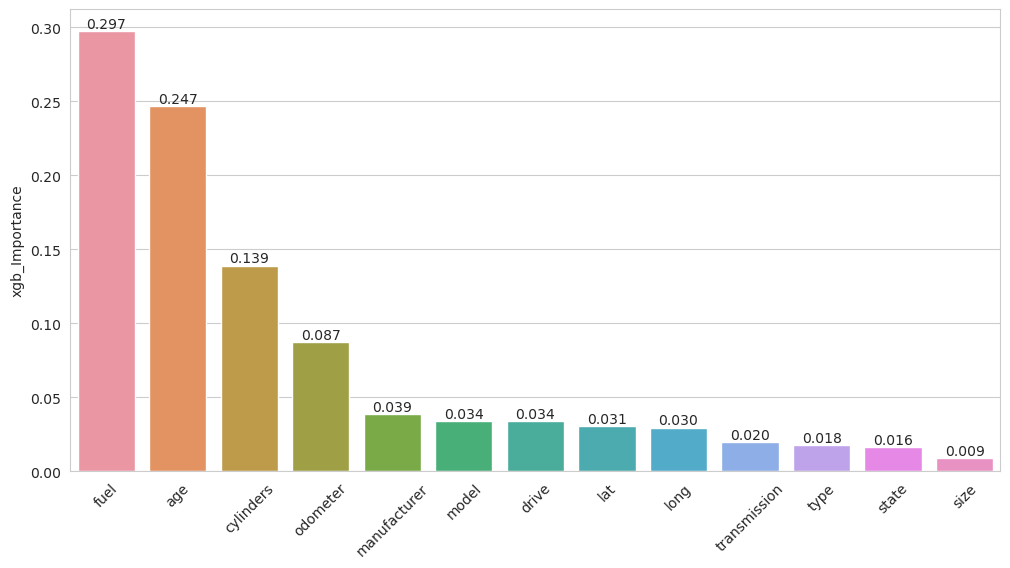

In [156]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=xgb_imp_fea, x=xgb_imp_fea.index, y='xgb_Importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=45);

### ANN Model

In [ ]:
df = pd.read_pickle('/kaggle/input/data-preparedpkl/data_prepared.pkl')
df

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# # define one hot encoding
# encoder = OneHotEncoder(sparse=False)
# # transform data
# X = encoder.fit_transform(X)

In [ ]:
X = pd.get_dummies(df, drop_first=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(SEED)

modelANN = Sequential()

modelANN.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
modelANN.add(Dropout(0.2))
modelANN.add(Dense(16, activation="relu"))
modelANN.add(Dropout(0.2))
modelANN.add(Dense(8, activation="relu"))
modelANN.add(Dropout(0.2))
modelANN.add(Dense(1, activation="linear"))
modelANN.summary()

modelANN.compile(optimizer=Adam(learning_rate=1e-4), 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
earlyStoppingCallback = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

modelANN.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[earlyStoppingCallback])

#### Final Model

In [ ]:
X_train.columns

In [157]:
X_new = df[['age', 'cylinders', 'fuel', 'odometer', 'long', 'manufacturer', 'model', 'lat']]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=101)

In [215]:
cat_new = X_new.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat_new),
                                       remainder='passthrough')

operations = [("OrdinalEncoder", column_trans),
              ("model_final",
               XGBRegressor(colsample_bytree=1,  #1
                            learning_rate=0.06,  #0.3
                            max_depth=6,  #6
                            n_estimators=2500,  #700
                            subsample=0.7,  #0.8
                            max_leaves=22,
                            objective='reg:squarederror',
                            random_state=42,
                            tree_method='gpu_hist',
#                             sampling_method="gradient_based",  #Used only by `gpu_hist` tree method.`uniform`, `gradient_based`
#                             grow_policy="lossguide"  #"depthwise"
#                             booster="gbtree"  #gbtree, 
                                                #dart:performs dropouts. Use preds=bst.predict(dtest, iteration_range=(0, num_round)) for test set
                           ))]

model_p_f = Pipeline(steps=operations)
model_p_f.fit(X_train, y_train)

train_val(model_p_f, X_train, y_train, X_test, y_test)

,train,test
R2,0.75,0.66
mae,4218.84,4757.21
mse,47720550.49,65118513.90
rmse,6908.01,8069.60


In [ ]:
# Final Model Results:

# 	train	test
# R2	0.83	0.78
# mae	3807.07	4148.53
# mse	36898028.85	45882339.25
# rmse	6074.37	6773.65

## Prediction

### Preprocess of Test Set

In [ ]:
test.describe()

In [ ]:
test.info()

In [ ]:
X_new.columns

In [ ]:
# Convert the "posting_date" column to datetime with the corrected format (including time zone offset)
test['posting_date'] = pd.to_datetime(test['posting_date'], utc=True)

# Set the time zone to the desired one, for example, 'America/New_York'
test['posting_date'] = test['posting_date'].dt.tz_convert('America/New_York')  # UTC -04:00

test['posting_year'] = test['posting_date'].dt.year
test["age"] = test["posting_year"] - test["year"]

In [ ]:
test["posting_date"].min(), test["posting_date"].max(), test["posting_date"].max() - test["posting_date"].min()

#### Transmission

In [ ]:
test["transmission"].value_counts(dropna=False)

In [ ]:
test['transmission'] = test['transmission'].replace('other', np.NaN)

In [ ]:
fill_missing(test, "transmission", ["manufacturer", "model", "drive", "type"])

In [ ]:
test["transmission"].isnull().sum()

#### Fuel

In [ ]:
test["fuel"].value_counts(dropna=False)

In [ ]:
test['fuel'] = test['fuel'].replace('other', np.NaN)

In [ ]:
fill_missing(test, "fuel", "model")

In [ ]:
test["fuel"].isnull().sum()

#### Type

In [ ]:
test["type"].value_counts(dropna=False)

In [ ]:
test['type'] = test['type'].replace('other', np.NaN)

In [ ]:
fill_missing(test, "type", ["manufacturer", "model", "fuel", "cylinders"])

In [ ]:
test["type"].isnull().sum()

#### Cylinders

In [ ]:
# Use a regular expression to extract the numeric part from the "cylinders" column
test['cylinders'] = test['cylinders'].str.replace(r'(\d+)\s*cylinders', r'\1', regex=True)

# Replace "other" with 1
test['cylinders'] = test['cylinders'].replace('other', np.nan)

# Convert the "cylinders" column to numeric type
test['cylinders'] = pd.to_numeric(test['cylinders'], errors='coerce')

# The "cylinders" column now contains the desired numeric values and NaN for missing values

In [ ]:
test.loc[test['fuel'] == 'electric', 'cylinders'] = 0

In [ ]:
fill_missing(test, "cylinders", ["manufacturer", "model", "fuel", "drive"])

In [ ]:
test["cylinders"].isnull().sum()

#### Latitude and Longitude

In [ ]:
# Group by the "state" column and calculate the mode of "lat" and "long" for each state group
state_mode_lat = test.groupby('state')['lat'].transform(lambda x: x.mode().iloc[0])
state_mode_long = test.groupby('state')['long'].transform(lambda x: x.mode().iloc[0])

# Fill missing values in "lat" and "long" columns with the mode of each state group
test['lat'] = test['lat'].fillna(state_mode_lat)
test['long'] = test['long'].fillna(state_mode_long)

In [ ]:
test[["lat", "long"]].isnull().sum()

#### Manufacturer

In [ ]:
fill_missing(test, "manufacturer", "model")

In [ ]:
test["manufacturer"].isnull().sum()

#### Drive

In [ ]:
fill_missing(test, "drive", ["manufacturer", "model", "fuel", "cylinders"])

In [ ]:
test["drive"].isnull().sum()

#### Size

In [ ]:
fill_missing(test, "size", ["manufacturer", "model", "type"])

In [ ]:
test["size"].isnull().sum()

In [ ]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation=45)
plt.show()

In [ ]:
test.describe()

In [ ]:
# test.drop(test[test['odometer'] > 1000000].index, axis=0, inplace=True)

In [ ]:
test.loc[test['odometer'] > 1000000, 'odometer'] = 1000000

In [ ]:
# test.drop(test[test['year'] < 1948].index, axis=0, inplace=True)

In [ ]:
test.loc[test['year'] < 1948, 'year'] = 1948

In [ ]:
# test.drop(test[test["age"] < 0].index, axis=0, inplace=True)

In [ ]:
test['age'] = test['age'].replace(-1, 0)

In [ ]:
# test.drop(test[test['age'] > 68].index, axis=0, inplace=True)

In [ ]:
# test.loc[test['age'] > 67, 'age'] = 67

In [ ]:
corr = test[['odometer', 'year', 'age', 'cylinders']].corr()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', ax=None, linewidths=1.5, center=0, annot=True,
            fmt='.2f', square=True, xticklabels=(corr.index), yticklabels=(corr.columns))

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid('off')
plt.show()

In [ ]:
test.columns

In [ ]:
test.drop(["posting_year", "title_status", "condition", "paint_color"], axis=1, inplace=True)

In [ ]:
# test.sort_values(by="posting_date", inplace=True)

In [ ]:
test.reset_index(inplace=True)

In [ ]:
test.isnull().sum().sort_values(ascending=False)

In [ ]:
test.shape, submission.shape

In [ ]:
X_new.columns

In [ ]:
test.columns

In [ ]:
test["pred"] = model_p_f.predict(test[X_new.columns])

In [ ]:
test["pred"].describe()

In [ ]:
test.info()

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(x='pred', data=test, bins=35, legend=False);
plt.xlabel("Predictions")
plt.show()

In [ ]:
test[test["pred"] < 0]

In [ ]:
min_pred = test[test["pred"] > 0].groupby(["fuel", "cylinders"])["pred"].min()

test = test.merge(min_pred.reset_index(), on=["fuel", "cylinders"], how="left", suffixes=("", "_min"))

replace_negative = lambda row: row["pred_min"] if row["pred"] < 0 else row["pred"]

# Apply the lambda function to update the "pred" column
test["pred"] = test.apply(replace_negative, axis=1)

# Drop the auxiliary columns used for merging
test.drop(columns=["pred_min"], inplace=True)

In [ ]:
test.info()

## Submission

In [ ]:
submission

In [ ]:
submission = test[["id", "pred"]]
submission

In [ ]:
submission.info()

In [ ]:
submission.describe()

In [ ]:
submission.to_csv("submission.csv", index=False)